In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline

In [121]:
df=pd.read_csv('./data/train.csv')
df.shape

(199991, 23)

In [1]:
df.describe()

In [123]:
col_name=list(df.columns)

In [2]:
for i in range(len(col_name)):
    try:
        x_temp=df[col_name[i]]
        print(col_name[i],' {:4f}   {:4f}   {:4f}'.format(\
            np.percentile(x_temp, 0.5),np.percentile(x_temp,50.0),np.percentile(x_temp,99.5)))
    except:
        pass

In [3]:
for i in range(len(col_name)):
    if df[col_name[i]].dtype == 'object':
        print(i, df[col_name[i]].unique())

In [126]:
try:
    del(df['fiberID'])
except:
    pass

df.corr(): 데이터프레임의 모든 변수 간 상관관계 계산하여 반환  
df.col1.corr(df.col2): df에서 col1과 col2의 상관관계 계산하여 반환  
df.cov() : 데이터프레임의 모든 변수 간 공분산을 계산하여 반환  
df.corrwith(df.col): 다른 시리즈나 데이터프레임과의 상관관계를 계산  

In [5]:
plt.figure(figsize=(12, 12))

ddf=df

try:
    del(ddf['id'])
except:
    pass

dddf=(ddf.corr()*100).astype('int32')

sns.heatmap(data = dddf, annot=True, fmt = 'd', linewidth=0.8, cmap='Reds')
#plt.xticks(rotation = 1)
plt.show()

- dropna: 누락된 데이터가 있는 축(행, 열)을 제외  어느 정도의 누락 데이터까지 용인할 것인지 지정 가능 
- fillna: 누락된 데이터를 대신할 값을 채우거나 'ffill', 'bfill' 같은 메서드 적용 가능 
- isnull: 누락되거나 NA인 값을 알려주는 불리언 값 객체 반환 
- notnull: isnull의 반대 

In [6]:
plt.figure(figsize=(15,55))

for i in range(0,21):
    
    try:
        plt.subplot(7,3,i+1)
        df.boxplot(column=[col_name[i]], notch=False, sym='+', vert=True, whis=3.)       
    except:
        pass
    
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(25,25))

scaler1 = StandardScaler()

for i in range(0,21):
   
    try:
        
        x=np.array(df[col_name[i]])
        x=x.reshape(-1,1)
        scaler1.fit(x)
        x_standard = scaler1.transform(x)
               
        x1 = x_standard.mean() - 3.*x_standard.std()
        x2 = x_standard.mean() + 3.*x_standard.std()
        
        idx1=np.where((x_standard < x1))
        x_standard = np.delete(x_standard, idx1)
        idx2=np.where((x_standard > x2))    
        xx = np.delete(x_standard, idx2)           

        plt.subplot(6,4,i+1)
        plt.hist(xx,bins=50)
        plt.gca().set_title(col_name[i])
        plt.xlim(x1,x2)
        
        try:
            print(i,col_name[i],'Index1',len(idx1[0]),'Index2',len(idx2[0]))
            print(x1,x2,xx.min(),xx.max(),xx.shape,'\n\n')

        except:
            pass
       
    except:
        pass

plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler

plt.figure(figsize=(25,25))

scaler1 = RobustScaler()

for i in range(0,21):
   
    try:
        
        x=np.array(df[col_name[i]])
        x=x.reshape(-1,1)
        scaler1.fit(x)
        x_standard = scaler1.transform(x)
        
        perc=0.025
        
        x1 = np.percentile(x_standard, perc)
        x2 = np.percentile(x_standard, 100.-perc)
        
        idx1=np.where((x_standard < x1))
        x_standard = np.delete(x_standard, idx1)
        idx2=np.where((x_standard > x2))    
        xx = np.delete(x_standard, idx2)           
        
        #xx = x_standard
        
        plt.subplot(6,4,i+1)
        plt.hist(xx,bins=100)
        plt.gca().set_title(col_name[i])
        plt.xlim(x1,x2)
        
        try:
            print(i,col_name[i],'Index1',len(idx1[0]),'Index2',len(idx2[0]))
            print(x1,x2,xx.min(),xx.max(),xx.shape,'\n\n')
            print(np.percentile(xx, perc),np.percentile(xx,50.0),np.percentile(xx, 100.-perc))

        except:
            pass
       
    except:
        pass

plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler

plt.figure(figsize=(25,25))

scaler1 = RobustScaler()
scaler2 = StandardScaler()

for i in range(0,21):
   
    try:
        
        x=np.array(df[col_name[i]])
        x=x.reshape(-1,1)
        scaler1.fit(x)
        x_standard = scaler1.transform(x)
        
        scaler2.fit(x_standard)
        x_standard = scaler2.transform(x_standard)
        
        x1 = x_standard.mean() - 3.*x_standard.std()
        x2 = x_standard.mean() + 3.*x_standard.std()

        print(x1, x2)
        
        idx1=np.where((x_standard < x1))
        x_standard = np.delete(x_standard, idx1)
        dx2=np.where((x_standard > x2))    
        xx = np.delete(x_standard, idx2)           
        
        #xx = x_standard
        
        plt.subplot(6,4,i+1)
        plt.hist(xx,bins=500)
        plt.gca().set_title(col_name[i])
        plt.xlim(x1,x2)
        
        try:
            print(i,col_name[i],'Index1',len(idx1[0]),'Index2',len(idx2[0]))
            print(x1,x2,xx.min(),xx.max(),xx.shape,'\n\n')
        except:
            pass
       
    except:
        pass

plt.show()

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

xp=[-15,-5,-4,-3,-2,-1,0,1,2,3,4,5,15]

[] [] -18.0 18.0


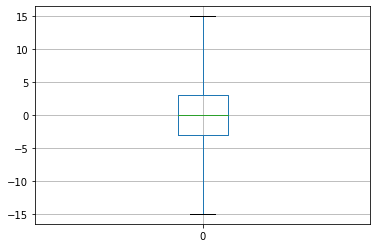

In [151]:
q1 = np.percentile(xp,25)
q3 = np.percentile(xp,75)

iqr = q3-q1
wh=1.5

qmax = q3+ wh*iqr
qmin = q1- wh*iqr

xp=np.array(xp)
print( xp[xp < qmin] , xp[xp > qmax] , qmin, qmax )

df=pd.DataFrame(xp)
df.boxplot(sym='+', whis=wh)  
plt.show()